# 导入数据

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
pass_ = pd.read_csv(r"C:\Users\Administrator\Desktop\中期考核\data\train\train.csv")
test_ = pd.read_csv(r"C:\Users\Administrator\Desktop\text\test2.csv")
pass_.head(10)


,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1
5,12531_23,T,T_3,134.0,23.0,offline,intermediate,12531.0,F,High School Diploma,1.0,29.0,4.0,N,2.0,0
6,17874_144,Y,Y_2,120.0,144.0,online,easy,17874.0,M,Bachelors,2.0,48.0,3.0,N,3.0,1
7,8129_61,U,U_1,134.0,NaN,online,easy,8129.0,M,Matriculation,2.0,45.0,1.0,N,1.0,1
8,5652_57,U,U_1,134.0,57.0,offline,easy,5652.0,M,Matriculation,4.0,NaN,3.0,N,3.0,1
9,17019_153,Y,Y_1,136.0,153.0,offline,hard,17019.0,M,Bachelors,3.0,28.0,2.0,N,4.0,1


In [179]:
pass_.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,49323.000000,49273.000000,49259.000000,49298.000000,30619.000000,49306.000000,49226.000000,49998.000000
mean,128.229366,91.414345,9863.493128,2.249097,36.514256,2.583114,2.397818,0.696288
std,6.889967,51.307852,5716.490640,1.010896,9.045487,1.239399,1.326378,0.459864
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5051.500000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,91.000000,9665.000000,2.000000,40.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14618.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20097.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [180]:
test_.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,11465.000000,11465.000000,11465.000000,11465.000000,7068.000000,11465.000000,11451.000000,0.0
mean,128.179067,90.116616,9801.775142,2.232708,36.352292,2.581771,2.382150,NaN
std,6.890919,51.172182,5658.995423,1.012618,8.993219,1.229564,1.314206,NaN
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,NaN
25%,121.000000,44.000000,5054.000000,1.000000,28.000000,2.000000,1.000000,NaN
50%,131.000000,89.000000,9580.000000,2.000000,39.000000,2.000000,2.000000,NaN
75%,134.000000,134.000000,14429.000000,3.000000,45.000000,3.000000,3.000000,NaN
max,136.000000,187.000000,20096.000000,4.000000,59.000000,12.000000,5.000000,NaN


# 补充缺失值

In [181]:
print(pass_["gender"].unique())
pass_["gender"] = pass_["gender"].fillna('F')
pass_.loc[pass_["gender"] == "M","gender"] = 0   #男为0，女为1
pass_.loc[pass_["gender"] == "F","gender"] = 1


['M' 'F' nan]


In [182]:
print(pass_["test_type"].unique())
pass_["test_type"] = pass_["test_type"].fillna('offline')
pass_.loc[pass_["test_type"] == "online","test_type"] = 0   #线上为0，线下为1
pass_.loc[pass_["test_type"] == "offline","test_type"] = 1

['offline' 'online' nan]


In [183]:
print(pass_["difficulty_level"].unique())
#pass_["difficulty_level"] = pass_["difficulty_level"].fillna('easy')
pass_.loc[pass_["difficulty_level"] == "easy","difficulty_level"] = 0          #简单为0，一般为1，难为2，很难为3
pass_.loc[pass_["difficulty_level"] == "intermediate","difficulty_level"] = 1
pass_.loc[pass_["difficulty_level"] == "hard","difficulty_level"] = 2
pass_.loc[pass_["difficulty_level"] == "vary hard","difficulty_level"] = 3


['intermediate' 'easy' 'hard' 'vary hard' nan]


In [184]:
print(pass_["education"].unique())
#pass_["education"] = pass_["education"].fillna('High School Diploma')
pass_.loc[pass_["education"] == "No Qualification","education"] = 0          #无文凭为0，中学文凭为1，大学文凭为2，硕士文凭为3，博士文凭为4
pass_.loc[pass_["education"] == "High School Diploma","education"] = 1
pass_.loc[pass_["education"] == "Matriculation","education"] = 2
pass_.loc[pass_["education"] == "Bachelors","education"] = 3
pass_.loc[pass_["education"] == "Masters","education"] = 4
pass_.groupby("education").describe()                                           #可判断哪个数据最多，以此选择填充数据

['Matriculation' 'High School Diploma' 'Bachelors' nan 'Masters'
 'No Qualification']


program_duration                                                    \
                     count        mean       std    min    25%    50%    75%   
education                                                                      
0                    329.0  126.130699  6.827442  117.0  120.0  122.0  133.0   
1                  22864.0  128.181814  6.890180  117.0  121.0  131.0  134.0   
2                  17413.0  128.243554  6.955481  117.0  121.0  131.0  135.0   
3                   7681.0  128.462961  6.737022  117.0  121.0  131.0  134.0   
4                    343.0  127.446064  6.547343  117.0  121.0  122.0  134.0   

                  test_id             ... trainee_engagement_rating       \
             max    count       mean  ...                       75%  max   
education                             ...                                  
0          136.0    329.0  93.392097  ...                       3.0  5.0   
1          136.0  22813.0  89.547626  ...                       3.0  5.0   
2          136.0  17422.0  97.047354  ...                       4.0  5.0   
3          136.0   7681.0  84.521547  ...                       4.0  5.0   
4          136.0    341.0  85.167155  ...                       4.0  5.0   

           is_pass                                               
             count      mean       std  min  25%  50%  75%  max  
education                                                        
0            333.0  0.597598  0.491120  0.0  0.0  1.0  1.0  1.0  
1          23161.0  0.716204  0.450849  0.0  0.0  1.0  1.0  1.0  
2          17662.0  0.647322  0.477817  0.0  0.0  1.0  1.0  1.0  
3           7795.0  0.742271  0.437412  0.0  0.0  1.0  1.0  1.0  
4            345.0  0.852174  0.355443  0.0  1.0  1.0  1.0  1.0  

[5 rows x 64 columns]

In [185]:
print(pass_["is_handicapped"].unique())
#pass_["is_handicapped"] = pass_["is_handicapped"].fillna('N')
pass_.loc[pass_["is_handicapped"] == "N","is_handicapped"] = 0          #无残疾为0，有残疾为1
pass_.loc[pass_["is_handicapped"] == "Y","is_handicapped"] = 1
  

['N' 'Y' nan]


In [186]:
print(pass_["program_type"].unique())
#pass_["program_type"] = pass_["program_type"].fillna('T')
pass_.loc[pass_["program_type"] == "Y","program_type"] = 0          
pass_.loc[pass_["program_type"] == "T","program_type"] = 1
pass_.loc[pass_["program_type"] == "Z","program_type"] = 2
pass_.loc[pass_["program_type"] == "V","program_type"] = 3
pass_.loc[pass_["program_type"] == "U","program_type"] = 4
pass_.loc[pass_["program_type"] == "X","program_type"] = 5
pass_.loc[pass_["program_type"] == "S","program_type"] = 6

['Y' 'T' 'Z' 'V' 'U' 'X' 'S' nan]


In [187]:
pass_.groupby("trainee_engagement_rating").describe()

program_duration                               \
                                     count        mean       std    min   
trainee_engagement_rating                                                 
1.0                                16973.0  127.413539  6.898136  117.0   
2.0                                11508.0  128.153458  6.541848  117.0   
3.0                                 7600.0  128.648421  6.798595  117.0   
4.0                                 8751.0  129.024454  7.094261  117.0   
5.0                                 3733.0  129.390838  7.138666  117.0   

                                                       test_id              \
                             25%    50%    75%    max    count        mean   
trainee_engagement_rating                                                    
1.0                        120.0  131.0  134.0  136.0  16950.0   74.943953   
2.0                        121.0  131.0  134.0  136.0  11507.0   84.422178   
3.0                        121.0  131.0  135.0  136.0   7582.0   98.405434   
4.0                        121.0  134.0  135.0  136.0   8749.0  114.865928   
5.0                        121.0  134.0  136.0  136.0   3728.0  119.030311   

                           ... total_programs_enrolled        is_pass  \
                           ...                     75%   max    count   
trainee_engagement_rating  ...                                          
1.0                        ...                     3.0  12.0  17200.0   
2.0                        ...                     3.0  14.0  11669.0   
3.0                        ...                     4.0  10.0   7709.0   
4.0                        ...                     3.0  14.0   8870.0   
5.0                        ...                     3.0  14.0   3778.0   

                                                                        
                               mean       std  min  25%  50%  75%  max  
trainee_engagement_rating                                               
1.0                        0.592558  0.491373  0.0  0.0  1.0  1.0  1.0  
2.0                        0.689519  0.462710  0.0  0.0  1.0  1.0  1.0  
3.0                        0.734207  0.441783  0.0  0.0  1.0  1.0  1.0  
4.0                        0.803720  0.397205  0.0  1.0  1.0  1.0  1.0  
5.0                        0.863684  0.343169  0.0  1.0  1.0  1.0  1.0  

[5 rows x 56 columns]

In [188]:
pass_["age"] = pass_["age"].fillna(pass_["age"].median())
#pass_["city_tier"] = pass_["city_tier"].fillna(pass_["city_tier"].median())
#pass_["program_duration"] = pass_["program_duration"].fillna(pass_["program_duration"].median())
#pass_["total_programs_enrolled"] = pass_["total_programs_enrolled"].fillna(2)
#pass_["trainee_engagement_rating"] = pass_["trainee_engagement_rating"].fillna(2)
#pass_["test_id"] = pass_["test_id"].fillna(90)



In [189]:
df = pd.DataFrame(pass_)     #删除有缺失值的数据
df.dropna(inplace = True)
pass_ =df

In [190]:
pass_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42659 entries, 0 to 49996
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     42659 non-null  object 
 1   program_type               42659 non-null  object 
 2   program_id                 42659 non-null  object 
 3   program_duration           42659 non-null  float64
 4   test_id                    42659 non-null  float64
 5   test_type                  42659 non-null  object 
 6   difficulty_level           42659 non-null  object 
 7   trainee_id                 42659 non-null  float64
 8   gender                     42659 non-null  object 
 9   education                  42659 non-null  object 
 10  city_tier                  42659 non-null  float64
 11  age                        42659 non-null  float64
 12  total_programs_enrolled    42659 non-null  float64
 13  is_handicapped             42659 non-null  obj

# 线性回归

In [191]:
from sklearn.linear_model import LinearRegression    #线性回归
from sklearn.model_selection import KFold           #交叉验证

In [192]:
predictors = ["program_type","test_id","trainee_engagement_rating","program_duration","education", "test_type", "difficulty_level", "gender", "city_tier", "total_programs_enrolled","age","is_handicapped",]
# 输入机器学习算法的特征

In [193]:
alg = LinearRegression()
kf = KFold(n_splits=3, random_state=1) # KFold类实例化

predictions = []

# 有3次for循环，每次建立一个回归模型
for train, test in kf.split(pass_):
    train_predictors = (pass_[predictors].iloc[train,:])           # 取出训练数据
    train_target = pass_["is_pass"].iloc[train] 
    alg.fit(train_predictors, train_target)                        # 训练模型
    test_predictions = alg.predict(pass_[predictors].iloc[test,:]) # 套入模型
    predictions.append(test_predictions)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [151]:
predictions = np.concatenate(predictions, axis=0)           # 转换成数组

# 使用线性回归得到的结果是在区间[0,1]上的某个值，需要将该值转换成0或1
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0
print("测试数据的总数量：", len(predictions))
print("正确的数量：", sum(predictions == pass_["is_pass"]))
accuracy = sum(predictions == pass_["is_pass"]) / len(predictions)
print("准确率为：", accuracy)

测试数据的总数量： 42659
正确的数量： 30034
准确率为： 0.704048383693945


### 代码实现(梯度下降)

In [152]:



class LinerRegreession2(object):
    def _init_(self,learning_rate=0.01,max_iter=1e4,seed=None):
        np.random.seed(seed)
        self.lr = learnig_rate   #设置学习率
        self.max_iter= max_iter
        self.loss_arr = []
    def standard(self,X):          #数据归一化
        standardScaler = StandardScaler()
        standardScaler.fit(X)
        X_standard = standardScaler.transform(X)
        return X_standard
    
    def fit_gd(self,X_train,y_train,eta=0.01,n_iter=1e4):
        
        X_train_standard = self.standard(X_train)
        
        def F(th,X_b,y):
            try:
                fx = np.sum((y - X_b.dot(th))**2)/len(X_b)
                return fx
            except:
                return float('inf')

        def dF(th , X_b ,y):
            a = np.empty(len(th))                  #用来装theta的
            a[0] = np.sum(X_b.dot(th) - y)
            for i in range(1,len(th)):
                a[i] = (X_b.dot(th) - y).dot(X_b[:,i])          #theta的计算
            return  a * 2 / len(X_b)

        def gra_descent(X_b , y ,initial_theta,eta,n_iter=1e4,ep = 1e-6):
            init_th =  initial_theta               #设置初始th值
            th = init_th
            i = 0
            while i < n_iter:
                td = dF(th ,X_b,y)
                last_th = th
                th = th - eta * td
                if(abs(F(th , X_b , y) - F(last_th , X_b , y)) < ep):
                    break
                i += 1
            return th

        self.X_b = np.hstack([np.ones((len(X_train_standard), 1)), X_train_standard])         #X矩阵加入X0，X0 = 1
        initial_theta = np.zeros(self.X_b.shape[1])
        self._theta = gra_descent(self.X_b,y_train,initial_theta,eta,n_iter)
        self.intercept_=self._theta[0]                       #截距
        self.coef_ = self._theta[1:]                         #系数
        
        return self
    def predict(self,x=None):           #预测函数
        x = self.standard(x)
        if x is None:
            x =self.X_b
        y_pred = x.dot(self.coef_)+self.intercept_
        return y_pred
        
    def score_(X , y , intercept , coef):                    #计算R方
        y_ture = y
        y_pred = X.dot(coef) + intercept
        u = ((y_ture - y_pred ) ** 2).sum()
        v = ((y_ture - y_ture.mean()) ** 2).sum()
        RR = ( 1 - u / v)
        return RR
                                       



In [153]:
from sklearn import datasets
import numpy as np

train_predictors = (pass_[predictors].iloc[train,:])           # 取出训练数据
X = pass_[predictors]
y = pass_["is_pass"]

from sklearn.model_selection import train_test_split
X_train,X_text,y_train ,y_text = train_test_split(X , y , random_state= 888)
from sklearn.preprocessing import StandardScaler    #归一化处理

lin2 = LinerRegreession2()
kf = KFold(n_splits=3, random_state=1) # KFold类实例化

predictions2 = []

# 有3次for循环，每次建立一个回归模型
for train, test in kf.split(pass_):
    train_predictors = (pass_[predictors].iloc[train,:])           # 取出训练数据
    train_target = pass_["is_pass"].iloc[train] 
    lin2.fit_gd(train_predictors, train_target)                        # 训练模型
    test_predictions = lin2.predict(pass_[predictors].iloc[test,:]) # 套入模型
    predictions2.append(test_predictions)

predictions2 = np.concatenate(predictions2, axis=0)           # 转换成数组

# 使用线性回归得到的结果是在区间[0,1]上的某个值，需要将该值转换成0或1
predictions2[predictions2 > 0.5] = 1
predictions2[predictions2 <= 0.5] = 0

print("测试数据的总数量：", len(predictions2))
print("正确的数量：", sum(predictions2 == pass_["is_pass"]))
accuracy = sum(predictions2 == pass_["is_pass"]) / len(predictions2)
print("准确率为：", accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


测试数据的总数量： 42659
正确的数量： 30042
准确率为： 0.7042359173914062


## 测试集数据处理

In [205]:

test_.loc[test_["gender"] == "M","gender"] = 0   #男为0，女为1
test_.loc[test_["gender"] == "F","gender"] = 1

test_.loc[test_["test_type"] == "online","test_type"] = 0   #线上为0，线下为1
test_.loc[test_["test_type"] == "offline","test_type"] = 1

test_.loc[test_["difficulty_level"] == "easy","difficulty_level"] = 0          #简单为0，一般为1，难为2，很难为3
test_.loc[test_["difficulty_level"] == "intermediate","difficulty_level"] = 1
test_.loc[test_["difficulty_level"] == "hard","difficulty_level"] = 2
test_.loc[test_["difficulty_level"] == "vary hard","difficulty_level"] = 3

test_.loc[test_["education"] == "No Qualification","education"] = 0          #无文凭为0，中学文凭为1，大学文凭为2，硕士文凭为3，博士文凭为4
test_.loc[test_["education"] == "High School Diploma","education"] = 1
test_.loc[test_["education"] == "Matriculation","education"] = 2
test_.loc[test_["education"] == "Bachelors","education"] = 3
test_.loc[test_["education"] == "Masters","education"] = 4

test_.loc[test_["is_handicapped"] == "N","is_handicapped"] = 0          #无残疾为0，有残疾为1
test_.loc[test_["is_handicapped"] == "Y","is_handicapped"] = 1

test_["trainee_engagement_rating"] = test_["trainee_engagement_rating"].fillna(1)

test_.loc[test_["program_type"] == "Y","program_type"] = 0          
test_.loc[test_["program_type"] == "T","program_type"] = 1
test_.loc[test_["program_type"] == "Z","program_type"] = 2
test_.loc[test_["program_type"] == "V","program_type"] = 3
test_.loc[test_["program_type"] == "U","program_type"] = 4
test_.loc[test_["program_type"] == "X","program_type"] = 5
test_.loc[test_["program_type"] == "S","program_type"] = 6

test_["age"] = test_["age"].fillna(pass_["age"].median())

# 线性回归测试集预测

In [155]:

train_predictors = pass_[predictors]               # 取出训练数据
train_target = pass_["is_pass"] 
lin2.fit_gd(train_predictors, train_target)            # 训练模型
test_predictions = lin2.predict(test_[predictors])  # 套入模型

#for i in test_predictions
test_predictions[test_predictions > 0.5] = 1
test_predictions[test_predictions <= 0.5] = 0
len(test_predictions)

11465

In [156]:
id_num = pd.read_csv("C:\\Users\\Administrator\\Desktop\\3\\test2.csv")["id_num"]#传入文件
df = pd.DataFrame({
    "id_num":id_num,
    "is_pass":test_predictions
})


df.to_csv("C:\\Users\\Administrator\\Desktop\\3\\test2.csv",index=False,encoding='utf_8')



# 逻辑回归

In [157]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=1, solver='liblinear') # 初始化逻辑回归类

score = model_selection.cross_val_score(log, pass_[predictors], pass_["is_pass"], cv=3)
print("准确率为：", score.mean())

准确率为： 0.7063925199693349


### 代码实现(逻辑回归)

In [158]:
import numpy as np
from sklearn.metrics import accuracy_score


class LogisticRegression2:

    def __init__(self):
        """初始化Linear Regression模型"""
        self.coef_ = None
        self.intercept_ = None
        self._theta = None

    def _sigmoid(self, t):
        t=np.array(t,dtype=np.float64)
        return 1. / (1. + np.exp(-t))

    def fit(self, X_train, y_train, eta=0.01, n_iters=1e4):
        """根据训练数据集X_train, y_train, 使用梯度下降法训练Logistic Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], \
            "X_train与 y_train的维度相等"

        def J(theta, X_b, y):
            y_hat = self._sigmoid(X_b.dot(theta))
            #print(y_hat)
            try:
                
                return np.float(- np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))) /np.float(len(y))
            except:
                return float('inf')

        def dJ(theta, X_b, y):
            return X_b.T.dot(self._sigmoid(X_b.dot(theta)) - y) / len(X_b)

        def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1):

            theta = initial_theta
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break

                cur_iter += 1

            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)

        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self



    def predict_proba(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果概率向量"""
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return self._sigmoid(X_b.dot(self._theta))

    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"

        proba = self.predict_proba(X_predict)
        return np.array(proba >= 0.5, dtype='int')

    def score(self, X_test, y_test):
        """根据测试数据集 X_test 和 y_test 确定当前模型的准确度"""

        y_predict = self.predict(X_test)
        return accuracy_score(y_test, y_predict)

    def __repr__(self):
        return "LogisticRegression()"



In [159]:
log2 =  LogisticRegression2()
log2.fit(pass_[predictors],pass_["is_pass"]) #
test_predictions = log2.predict(pass_[predictors])  # 套入模型

print("测试数据的总数量：", len(test_predictions))
print("正确的数量：", sum(test_predictions == pass_["is_pass"]))
accuracy = sum(test_predictions == pass_["is_pass"]) / len(test_predictions)
print("准确率为：", accuracy)





<ipython-input-158-abb83e98d709>:27: RuntimeWarning: divide by zero encountered in log
  return np.float(- np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))) /np.float(len(y))


测试数据的总数量： 42659
正确的数量： 29729
准确率为： 0.6968986614782343


In [160]:
from sklearn import datasets
import numpy as np

train_predictors = (pass_[predictors].iloc[train,:])           # 取出训练数据
X = pass_[predictors]
y = pass_["is_pass"]

from sklearn.model_selection import train_test_split
X_train,X_text,y_train ,y_text = train_test_split(X , y , random_state= 888)
from sklearn.preprocessing import StandardScaler    #归一化处理

log2 = LogisticRegression2()
kf = KFold(n_splits=3, random_state=1) # KFold类实例化

predictions2 = []

# 有3次for循环，每次建立一个回归模型
for train, test in kf.split(pass_):
    train_predictors = (pass_[predictors].iloc[train,:])           # 取出训练数据
    train_target = pass_["is_pass"].iloc[train] 
    log2.fit(train_predictors, train_target)                        # 训练模型
    test_predictions = log2.predict(pass_[predictors].iloc[test,:]) # 套入模型
    predictions2.append(test_predictions)

predictions2 = np.concatenate(predictions2, axis=0)           # 转换成数组

# 使用线性回归得到的结果是在区间[0,1]上的某个值，需要将该值转换成0或1
predictions2[predictions2 > 0.5] = 1
predictions2[predictions2 <= 0.5] = 0

print("测试数据的总数量：", len(predictions2))
print("正确的数量：", sum(predictions2 == pass_["is_pass"]))
accuracy = sum(predictions2 == pass_["is_pass"]) / len(predictions2)
print("准确率为：", accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
<ipython-input-158-abb83e98d709>:27: RuntimeWarning: divide by zero encountered in log
  return np.float(- np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))) /np.float(len(y))


测试数据的总数量： 42659
正确的数量： 29628
准确率为： 0.6945310485477859


for train, test in kf.split(pass_):
    train_target = pass_["is_pass"].iloc[train]
    full_test_predictions = []
    i = 0
    for alg, predictors in algorithms:
        
        alg.fit(pass_[predictors].iloc[train,:], train_target)
        if i<3:
            test_predictions = alg.predict_proba(test_[predictors].astype(float)) [:,1]
        else:
            test_predictions = alg.predict(test_[predictors].astype(float)) 
        full_test_predictions.append(test_predictions)
        i = i+1

# 随机森林

In [170]:
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.ensemble import RandomForestClassifier

predictors = ["program_type","test_id","program_duration", "education","trainee_engagement_rating","gender","test_type", "city_tier", "difficulty_level","age","is_handicapped"]

#, "total_programs_enrolled"
rand = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2)
kf = model_selection.KFold(n_splits=3, random_state=1)           #交叉验证
scores = model_selection.cross_val_score(rand, pass_[predictors], pass_["is_pass"], cv=kf)
print("随机森林模型的准确率："  +str(scores.mean()))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


随机森林模型的准确率：0.7167303315390515


<ipython-input-171-1ba8c140d637>:5: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selector.pvalues_)


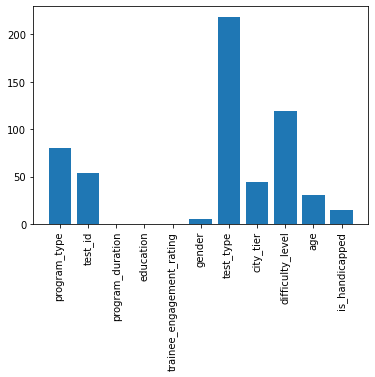

In [171]:
#重要程度
selector = SelectKBest(f_classif, k=5) # f_classif：基于方差分析的检验统计f值，根据k个最高分数选择功能
selector.fit(pass_[predictors], pass_["is_pass"])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

去掉一部分特征

In [166]:
#predictors = ["test_id","test_type",  "difficulty_level", "gender", "city_tier", "total_programs_enrolled","age","is_handicapped",]

发现没有更准确

In [167]:
predictors =  ["program_type","test_id","program_duration", "education","test_type","trainee_engagement_rating", "city_tier", "difficulty_level","age","is_handicapped"]

去除性别特征，发现更准确

## 测试集预测(随机森林)

In [68]:
test_rand = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2)
#kf = model_selection.KFold(n_splits=3, random_state=1)   #交叉验证

rand_train_predictors = pass_[predictors] # 取出训练数据
rand_train_target = pass_["is_pass"] # 获取到数据集中交叉分类好的标签，即是否录取了


test_rand.fit(rand_train_predictors, rand_train_target) # 训练模型
rand_test_predictions = test_rand.predict(test_[predictors]) 

rand_test_predictions[rand_test_predictions > 0.5] = 1
rand_test_predictions[rand_test_predictions <= 0.5] = 0
print(rand_test_predictions)

id_num = pd.read_csv("C:\\Users\\Administrator\\Desktop\\4\\test2.csv")["id_num"]
df = pd.DataFrame({
    "id_num":id_num,
    "is_pass":rand_test_predictions
})


df.to_csv("C:\\Users\\Administrator\\Desktop\\4\\test2.csv",index=False,encoding='utf_8')

[1 1 1 ... 1 1 1]


# 集成多个分类

In [261]:
pass_

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,0,Y_1,136.0,150.0,1,1,9389.0,0,2,3.0,24.0,5.0,0,1.0,0
1,16523_44,1,T_1,131.0,44.0,1,0,16523.0,1,1,4.0,26.0,2.0,0,3.0,1
2,13987_178,2,Z_2,120.0,178.0,0,0,13987.0,0,2,1.0,40.0,1.0,0,2.0,1
3,13158_32,1,T_2,117.0,32.0,1,0,13158.0,1,2,3.0,40.0,4.0,0,1.0,1
4,10591_84,3,V_3,131.0,84.0,1,1,10591.0,1,1,1.0,42.0,2.0,0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,13936_61,4,U_1,134.0,61.0,0,0,13936.0,0,3,4.0,26.0,3.0,0,1.0,0
49992,12375_173,2,Z_2,120.0,173.0,0,0,12375.0,1,2,4.0,26.0,1.0,0,1.0,1
49993,4379_115,0,Y_4,121.0,115.0,1,2,4379.0,1,1,2.0,40.0,5.0,0,4.0,1
49995,18109_42,1,T_2,117.0,42.0,0,0,18109.0,1,1,2.0,41.0,2.0,0,1.0,1


In [258]:
pass_["is_pass"]

0        0
1        1
2        1
3        1
4        1
        ..
49991    0
49992    1
49993    1
49995    1
49996    1
Name: is_pass, Length: 42659, dtype: int64

In [216]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

algorithms = [
    [RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2),predictors],
    [GradientBoostingClassifier(random_state=5, n_estimators=50, max_depth=10), predictors ],     
    [LogisticRegression2(), predictors],
    [LinerRegreession2(),predictors]                  #加入线性回归
]

kf = KFold(n_splits=10, random_state=5)              

l_predictions = []
l_all_ = []
for train, test in kf.split(pass_):
    train_target = pass_["is_pass"].iloc[train]
    full_test_predictions = []
    i = 0
    for alg, predictors in algorithms:
        if i<3:
            alg.fit(pass_[predictors].iloc[train,:], train_target)
        else:
            alg.fit_gd(pass_[predictors].iloc[train,:], train_target)
        if i<2:
            test_predictions = alg.predict_proba(pass_[predictors].astype(float)) [:,1]
        else:
            test_predictions = alg.predict(pass_[predictors].astype(float)) 
        full_test_predictions.append(test_predictions)
        i = i+1
        
    
        
    test_predictions = (full_test_predictions[0]*3 + full_test_predictions[1]+full_test_predictions[2]+full_test_predictions[3]) /6
    l_all_.append(test_predictions)
    
l_predictions = (l_all_[0]+l_all_[1]+l_all_[2]+l_all_[3]+l_all_[4]+l_all_[5]+l_all_[6]+l_all_[7]+l_all_[8]+l_all_[9])/10           #数据平均值
l_predictions[test_predictions <= 0.5] = 0
l_predictions[test_predictions > 0.5] = 1
#


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
<ipython-input-158-abb83e98d709>:27: RuntimeWarning: divide by zero encountered in log
  return np.float(- np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))) /np.float(len(y))
<ipython-input-158-abb83e98d709>:27: RuntimeWarning: divide by zero encountered in log
  return np.float(- np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))) /np.float(len(y))
<ipython-input-158-abb83e98d709>:27: RuntimeWarning: divide by zero encountered in log
  return np.float(- np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))) /np.float(len(y))
<ipython-input-158-abb83e98d709>:27: RuntimeWarning: divide by zero encountered in log
  return np.float(- np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))) /np.float(len(y))
<ipython-input-158-ab

l_id_num = pd.read_csv("C:\\Users\\Administrator\\Desktop\\6\\test2.csv")["id_num"]
df = pd.DataFrame({
    "id_num":l_id_num,
    "is_pass":l_predictions
})


df.to_csv("C:\\Users\\Administrator\\Desktop\\6\\test2.csv",index=False,encoding='utf_8')

In [217]:
len(l_predictions)
l_predictions

array([0., 1., 1., ..., 1., 1., 1.])

In [218]:
accuracy = sum(l_predictions == pass_["is_pass"]) / len(l_predictions)
print(accuracy)

0.7823905858083875


In [ ]:
print(l_predictions)

In [206]:
test_[predictors]

,program_type,test_id,trainee_engagement_rating,program_duration,education,test_type,difficulty_level,gender,city_tier,total_programs_enrolled,age,is_handicapped
0,1,31,2.0,134,3,0,0,1,1,4,24.0,0
1,0,148,4.0,120,2,0,0,0,3,2,26.0,0
2,0,114,1.0,121,1,1,1,0,1,3,40.0,0
3,2,175,1.0,120,1,0,0,1,1,1,40.0,1
4,1,25,2.0,134,1,1,1,0,2,2,42.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11460,5,108,2.0,121,2,1,2,0,3,1,40.0,0
11461,1,44,3.0,131,1,1,0,1,3,4,40.0,0
11462,0,131,4.0,135,2,0,0,0,4,2,44.0,0
11463,2,166,3.0,130,2,0,0,1,4,1,31.0,0


In [219]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

algorithms = [
    [RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2),predictors],
    [GradientBoostingClassifier(random_state=5, n_estimators=50, max_depth=10), predictors ],     
    [LogisticRegression2(), predictors],
    [LinerRegreession2(),predictors]                  #加入线性回归
]

kf = KFold(n_splits=10, random_state=5)              

l_predictions = []
l_all_ = []
for train, test in kf.split(pass_):
    train_target = pass_["is_pass"].iloc[train]
    full_test_predictions = []
    i = 0
    for alg, predictors in algorithms:
        if i<3:
            alg.fit(pass_[predictors].iloc[train,:], train_target)
        else:
            alg.fit_gd(pass_[predictors].iloc[train,:], train_target)
        if i<2:
            test_predictions = alg.predict_proba(test_[predictors].astype(float)) [:,1]
        else:
            test_predictions = alg.predict(test_[predictors].astype(float)) 
        full_test_predictions.append(test_predictions)
        i = i+1
        
    
        
    test_predictions = (full_test_predictions[0]*3 + full_test_predictions[1]+full_test_predictions[2]+full_test_predictions[3]) /6
    l_all_.append(test_predictions)
    
l_predictions = (l_all_[0]+l_all_[1]+l_all_[2]+l_all_[3]+l_all_[4]+l_all_[5]+l_all_[6]+l_all_[7]+l_all_[8]+l_all_[9])/10           #数据平均值
l_predictions[test_predictions <= 0.5] = 0
l_predictions[test_predictions > 0.5] = 1
#
#predictions = np.concatenate(predictions, axis=0)
#

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
<ipython-input-158-abb83e98d709>:27: RuntimeWarning: divide by zero encountered in log
  return np.float(- np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))) /np.float(len(y))
<ipython-input-158-abb83e98d709>:27: RuntimeWarning: divide by zero encountered in log
  return np.float(- np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))) /np.float(len(y))
<ipython-input-158-abb83e98d709>:27: RuntimeWarning: divide by zero encountered in log
  return np.float(- np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))) /np.float(len(y))
<ipython-input-158-abb83e98d709>:27: RuntimeWarning: divide by zero encountered in log
  return np.float(- np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))) /np.float(len(y))
<ipython-input-158-ab

In [220]:
print(l_predictions)
len(l_predictions)

[1. 1. 1. ... 1. 1. 1.]


11465

In [222]:
l_id_num = pd.read_csv("C:\\Users\\Administrator\\Desktop\\7\\test2.csv")["id_num"]       #传入文件
df = pd.DataFrame({
    "id_num":l_id_num,
    "is_pass":l_predictions
})


df.to_csv("C:\\Users\\Administrator\\Desktop\\7\\test2.csv",index=False,encoding='utf_8')